In [1]:
%matplotlib inline

In [2]:
morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'

import os
from astropy.table import Table
v4_prerelease_dirname = "/Users/aphearin/Dropbox/protoDC2/v4_prerelease"
v4_prerelease_fname = os.path.join(
    v4_prerelease_dirname, "v4_prerelease_no_interpolation.hdf5")
v4 = Table.read(v4_prerelease_fname, path='data')

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
print(v4.keys())

['redshift', 'mstar', 'hostHaloMass', 'isCentral', 'mag_g', 'mag_r', 'mag_i', 'mag_g_obs', 'mag_r_obs', 'mag_i_obs', 'Lum_g', 'Lum_r', 'Lum_i', 'disk_mag_r', 'bulge_mag_r', 'lum_tot_r', 'bulge_rhalf_arcsec', 'disk_rhalf_arcsec', 'bt', 'ang_diam_dist_Mpc', 'bulge_rhalf_kpc_phys', 'disk_rhalf_kpc_phys']


In [41]:
def remap_mag_obs(mag_obs_old, mag_abs_old, mag_abs_new):
    dmag = mag_obs_old - mag_abs_old
    mag_obs_new = dmag + mag_abs_new
    return mag_obs_new


In [57]:
def median_magr_from_mstar(mstar, beta=3.25, gamma=2.15, m1=10., magr_at_m1=-19.75):
    m_by_m1 = mstar/10.**m1
    denom_term1 = m_by_m1**beta
    denom_term2 = m_by_m1**gamma
    result = 1. / (denom_term1 + denom_term2)
    return np.log10(result*mstar) - np.log10(0.5*10**m1) + magr_at_m1

def mc_magr_from_mstar(mstar, scatter=0.15, **kwargs):
    """
    """
    median_magr = median_magr_from_mstar(mstar, **kwargs)
    return np.random.normal(loc=median_magr, scale=scatter)


In [58]:
v4['mag_r_new'] = mc_magr_from_mstar(v4['mstar'])
v4['mag_r_obs_new'] = remap_mag_obs(v4['mag_r_obs'], v4['mag_r'], v4['mag_r_new'])


In [59]:

# def abs_mag_boost(mstar, logsm_table=[6, 8, 9.5], boost_table=[-10, -3, 0]):
#     return np.interp(np.log10(mstar), logsm_table, boost_table)

# boost = abs_mag_boost(v4['mstar'])
# v4['mag_r_new'] = v4['mag_r'] + boost
# v4['mag_r_obs_new'] = remap_mag_obs(v4['mag_r_obs'], v4['mag_r'], v4['mag_r_new'])

# fig, ax = plt.subplots(1, 1)

# nskip=500
# __=ax.scatter(v4['mag_r'][::nskip], 
#               v4['mag_r_new'][::nskip]-v4['mag_r'][::nskip], s=0.1)

# xlim = ax.set_xlim(-10, -23)

In [60]:
# fig, ax = plt.subplots(1, 1)

# nskip=500
# __=ax.scatter(np.log10(v4['mstar'][::nskip]), v4['mag_r'][::nskip], s=0.1)

# ylim = ax.set_ylim(-10, -24)

## HSC cumulative LF validation test 

In [ ]:
magarr = np.linspace(20, 30, 30)
magmasks = list((v4['mag_r_obs'] < m) for m in magarr)
counts = np.array([np.count_nonzero(mask) for mask in magmasks])
magmasks_new = list((v4['mag_r_obs_new'] < m) for m in magarr)
counts_new = np.array([np.count_nonzero(mask) for mask in magmasks_new])

sky_area = 25.
fig, ax = plt.subplots(1, 1)
yscale = ax.set_yscale('log')
hsc_ordinates = [1e4, 1e5, 1e6]
hsc_abscissa = [22, 25, 27.5]
__=ax.plot(hsc_abscissa, hsc_ordinates, label=r'${\rm HSC}$', color=mgreen)

__=ax.plot(magarr, counts/sky_area, label=r'${\rm v4\ prerelease}$', color=morange)
__=ax.plot(magarr, counts_new/sky_area, label=r'${\rm v4}$', color=mblue)

xlabel = ax.set_xlabel(r'${\rm m_{r}}$')
ylabel = ax.set_ylabel(r'${\rm n(<m)\ [deg^{-2}]}$')
legend = ax.legend()
ylim = ax.set_ylim(1e2, 5e6)



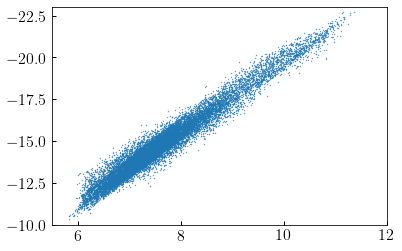

In [34]:
fig, ax = plt.subplots(1, 1)

nskip=500
__=ax.scatter(np.log10(v4['mstar'][::nskip]), v4['mag_r'][::nskip], s=0.1)

xlim = ax.set_xlim(5.5, 12)
ylim = ax.set_ylim(-10, -23)


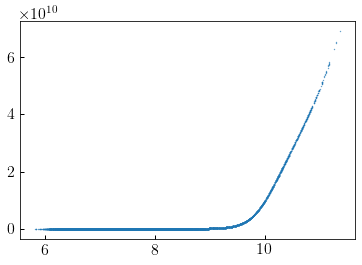

In [38]:
# Calculate each term contributing to Eqn 2
n = 1.
m1 = 10.
beta = 1.3
gamma = 0.6
norm = 2.*n*v4['mstar']
m_by_m1 = v4['mstar']/(10.**m1)
denom_term1 = m_by_m1**(-beta)
denom_term2 = m_by_m1**gamma

result = norm / (denom_term1 + denom_term2)

fig, ax = plt.subplots(1, 1)

nskip=500
__=ax.scatter(np.log10(v4['mstar'][::nskip]), result[::nskip], s=0.1)

# xlim = ax.set_xlim(5.5, 12)
# ylim = ax.set_ylim(-10, -23)
